# Situation Report: 29th October 2024
I have a meeting with my supervisor tomorrow, the first one since starting work on this project. As a result, a lot of things have happened; it is sensible, I think, to go through everything I've done so far and explain my reasoning for each step, to ensure it is well-organised in my mind before I speak to her about it. I will also go through what problems I currently face, and a rough roadmap for where I see this project going. Note: I have decided to write this in a Jupyter notebook, as it allows me to more explicitly talk through what code I have done.

In [2]:
from qiskit import QuantumCircuit

## Progress Up To This Point
My progress up to this point can be broken up into a series of bullet points, all of which will be explained fully in their own sections. So far I have:

- Created a very simple swap test circuit for fidelity evaluation and tested it briefly.
- Trained a Lambeq model using the `mc_train` and `mc_dev` data found in the [lambeq docs](https://github.com/CQCL/lambeq-docs/tree/main/docs/examples/datasets) and evaluated its accuracy using the `mc_test` data found in the same location.
- Written a function to parse a sentence through the trained model and extract the resulting quantum circuit.
- Written a function which composes the quantum circuits of two sentences and adds a swap test circuit to test the fidelity between the sentence qubits.
- Written a function to rank the similarity of sentences using both my lambeq model and a pre-tested BERT model.
- Implemented a vague arbitrary NDCG calculation to quantifiably evaluate the rankings of my model against the rankings of the BERT model.

### Simple Swap Test

Consider two states, $|\psi\rangle$ and $\phi\rangle$. Conceptually the simplest measurement fidelity is the absolute square of the contraction of these two states:

$\begin{equation}
\textrm{Fidelity} = |\langle \phi|\psi\rangle|^2
\end{equation}$

As outlined by [Basheer, Afham and Goyal](https://arxiv.org/pdf/2003.09187) in 2021, a simple swap test can be used to determine the fidelity between two qubit states. The swap test is shown below - qubits 1 and 2 have the states you wish to compare, and qubit 0 acts as a 'control' qubit which is measured to obtain the fidelity measurement.

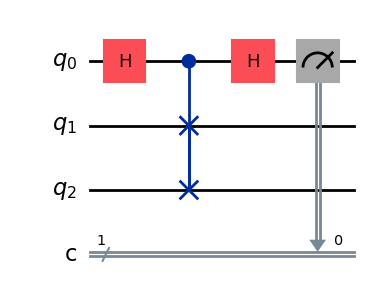

In [3]:
swap_circ = QuantumCircuit(3, 1)

swap_circ.h(0)
swap_circ.cswap(0, 1, 2)
swap_circ.h(0)
swap_circ.measure(0, 0)
swap_circ.draw('mpl')

The control qubit is initially placed in the state $|0\rangle$. Let us assume that qubit 1 is prepared in the state $|\psi\rangle$ and that qubit 2 is prepared in the state $|\phi\rangle$, as shown in the circuit diagram above. Thus the initial state of the circuit is $|\Psi\rangle = |0\psi \phi\rangle$. After the Hadamard on the control qubit this state becomes $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|\psi \phi\rangle$. Then after the controlled-swap gate the state becomes $\frac{1}{\sqrt{2}}(|0 \psi \phi\rangle) + |1\phi\psi\rangle)$. The second Hadamard gives us the final state of the quantum circuit:
$\begin{equation}
    \frac{1}{2}(|0 \psi \phi\rangle+|1 \psi \phi\rangle+|0 \phi \psi\rangle-|1 \phi \psi\rangle)
\end{equation}$

We can see that when measuring the control qubit, the outcomes of the measurement are as follows:
$\begin{align}
    \textrm{Prob}(0) &= \frac{1}{4}(\langle \psi \phi| +  \langle\phi\psi|)(|\psi \phi\rangle + |\phi\psi\rangle) = \frac{1}{2} + \frac{1}{2}|\langle \psi | \phi \rangle|^2\\
    \textrm{Prob}(1) &= \frac{1}{4}(\langle \psi \phi| - \langle\phi\psi|)(|\psi \phi\rangle - |\phi\psi\rangle) = \frac{1}{2} - \frac{1}{2}|\langle \psi | \phi \rangle|^2
\end{align}$
Thus we can see that the fidelity will be given by the following:
$\begin{equation}
    \textrm{Fidelity} = |\langle \psi | \phi \rangle|^2 = \textrm{Prob}(0) - \textrm{Prob}(1)
\end{equation}$

Thus we can run the swap test circuit many times to statistically estimate the probabilities of measuring 0 and 1, and use these to find the fidelity between the two states.

### Training a Lambeq Model

## Current Challenges

## Roadmap For The Future

Once I have finetuned my approach